In [1]:
# Written by Herman van Haagen, https://www.linkedin.com/in/hermanvanhaagen/

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Functions

In [3]:
# This is a simple function that shows how the spiral data looks like
def plotspiraldataset(x,y,labels):
    neg = np.where(labels==0)[0]
    pos = np.where(labels==1)[0]
    plt.scatter(x[neg],y[neg])
    plt.scatter(x[pos],y[pos])
    plt.show()

In [4]:
# The activation function for the hidden layers
def ReLU(x):
    return np.maximum(0,x)

In [5]:
# The derivatie of the ReLU
def ReLU_prime(x):
    return (x>0)*1

In [6]:
def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

In [7]:
# We are using a softmax activation function as the output. 
# For that we need to label our labels as onehot. 
def onehot(label):
    if label==1.0:
        x = np.array([0,1])
        return x[:,np.newaxis]
    if label==0.0:
        x = np.array([1,0])
        return x[:,np.newaxis]

### Load spiral dataset

In [8]:
# Load the spiral dataset
spiral = pd.read_csv('spiral.csv',sep=',')

In [9]:
# Check the first 5 rows of the data
spiral.head()

,x,y,label
0,8.75789,4.91060,1.0
1,2.77911,-14.11911,0.0
2,6.62426,8.03778,1.0
3,8.88349,-12.84646,0.0
4,-4.09557,12.05776,1.0


In [10]:
# Normalize the dataset using the mi/nmax normalizer
spiral['x'] = spiral['x']-np.min(spiral['x'])
spiral['y'] = spiral['y']-np.min(spiral['y'])
spiral['x'] = spiral['x']/np.max(spiral['x'])
spiral['y'] = spiral['y']/np.max(spiral['y'])

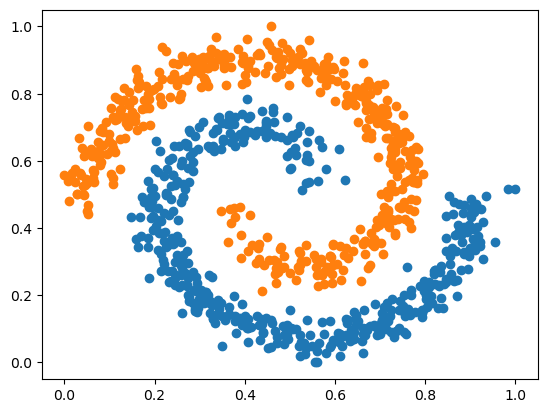

In [11]:
# Then we plot the spiral data
plotspiraldataset(spiral['x'],spiral['y'],spiral['label'])

### Initialize weights and training parameters

In [12]:
epochs = 200
lr = 0.1

In [13]:
N = 64
W0 = np.random.rand(N,2)
W1 = np.random.rand(2,N)
B0 = np.random.rand(N,1)
B1 = np.random.rand(2,1)

In [14]:
for k in range(epochs):
            
    for index, row in spiral.iterrows():
        
        # Select one instance of the data (stochastic gradient descent)
        X0 = np.array(row[0:2])
        X0 = X0[ :,np.newaxis]
        label = row['label']
        
        #The forward pass
        Y0 = np.matmul(W0, X0)+B0
        X1 = ReLU(Y0)
        Y1 = np.matmul(W1, X1)+B1
        X2 = ReLU(Y1)
        
        out = softmax(X2)
    
        # backpropagation
        error = out-onehot(label)
        
        d1  = error*ReLU_prime(Y1)
        dW1 = np.matmul(d1,np.transpose(X1))
        dB1 = d1
    
        d0  = np.matmul(np.transpose(W1),d1)*ReLU_prime(Y0)
        dW0 = np.matmul(d0,np.transpose(X0))
        dB0 = d0

        #update rule
        W0 = W0-lr*dW0
        W1 = W1-lr*dW1
        B0 = B0-lr*dB0
        B1 = B1-lr*dB1
        
    print('epoch:'+str(k))

epoch:0
epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7
epoch:8
epoch:9
epoch:10
epoch:11
epoch:12
epoch:13
epoch:14
epoch:15
epoch:16
epoch:17
epoch:18
epoch:19
epoch:20
epoch:21
epoch:22
epoch:23
epoch:24
epoch:25
epoch:26
epoch:27
epoch:28
epoch:29
epoch:30
epoch:31
epoch:32
epoch:33
epoch:34
epoch:35
epoch:36
epoch:37
epoch:38
epoch:39
epoch:40
epoch:41
epoch:42
epoch:43
epoch:44
epoch:45
epoch:46
epoch:47
epoch:48
epoch:49
epoch:50
epoch:51
epoch:52
epoch:53
epoch:54
epoch:55
epoch:56
epoch:57
epoch:58
epoch:59
epoch:60
epoch:61
epoch:62
epoch:63
epoch:64
epoch:65
epoch:66
epoch:67
epoch:68
epoch:69
epoch:70
epoch:71
epoch:72
epoch:73
epoch:74
epoch:75
epoch:76
epoch:77
epoch:78
epoch:79
epoch:80
epoch:81
epoch:82
epoch:83
epoch:84
epoch:85
epoch:86
epoch:87
epoch:88
epoch:89
epoch:90
epoch:91
epoch:92
epoch:93
epoch:94
epoch:95
epoch:96
epoch:97
epoch:98
epoch:99
epoch:100
epoch:101
epoch:102
epoch:103
epoch:104
epoch:105
epoch:106
epoch:107
epoch:108
epoch:109
epoch:110


### Visualize the trained results

In [15]:
# Fill a grid of 1 by 1 with random number
x = np.random.rand(10000)
y = np.random.rand(10000)

In [16]:
# Classify these numbers with the trained classifier
# This will show how the discriminant lines look like. 
pred = []
for k in range(len(x)):
        
    X0 = np.array([x[k],y[k]])
    X0 = X0[ :,np.newaxis]
        
    #The forward pass
    Y0 = np.matmul(W0, X0)+B0
    X1 = ReLU(Y0)
    Y1 = np.matmul(W1, X1)+B1
    X2 = ReLU(Y1)
    out = np.exp(X2)/np.sum(np.exp(X2))
            
    prediction = float(out[0][0])>0.5
    if label!=prediction:
        pred += [k]

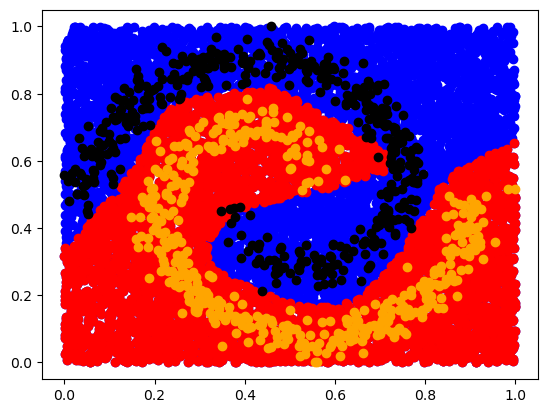

In [17]:
# Plot the discriminant lines (in red and blue) with the original dataset
plt.scatter(x,y,color='blue')
plt.scatter(x[pred],y[pred],color='red')

neg = np.where(spiral['label']==0)[0]
pos = np.where(spiral['label']==1)[0]
plt.scatter(spiral['x'][neg],spiral['y'][neg],color='orange')
plt.scatter(spiral['x'][pos],spiral['y'][pos],color='black')
plt.show()